In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data=pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

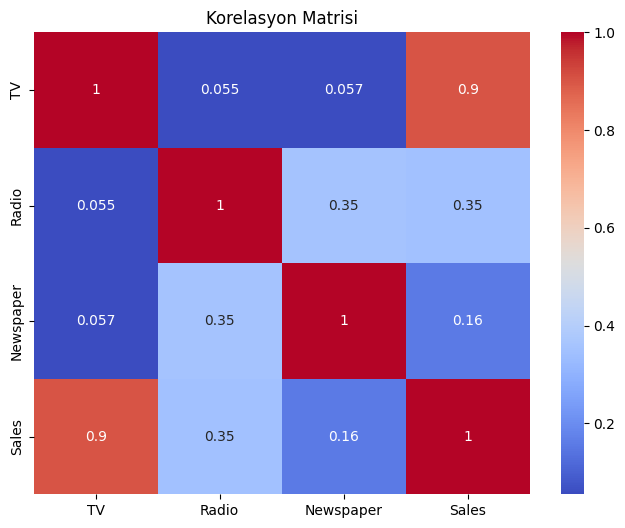

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


In [7]:
X = data[['TV', 'Radio', 'Newspaper']] 
y = data['Sales']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

## Model Results
This section evaluates the linear regression model predicting sales based on advertising budgets (TV, Radio, Newspaper):

- **R² Score**: Shows how well the model explains sales (closer to 1 is better).
- **MSE**: Measures the size of prediction errors (lower is better).
- **Coefficients**: Indicates which ad type impacts sales the most (higher coefficient = more impact).
- **Plot**: Compares actual vs. predicted sales.

In [11]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [12]:
results = pd.DataFrame({
    'Metrik': ['R² Skoru', 'Ortalama Kare Hata (MSE)'],
    'Değer': [r2, mse]
})
display(results)

,Metrik,Değer
0,R² Skoru,0.905901
1,Ortalama Kare Hata (MSE),2.907757


In [13]:
coef_df = pd.DataFrame({
    'Reklam Türü': ['TV', 'Radio', 'Newspaper'],
    'Katsayı': model.coef_
})
coef_df.loc[len(coef_df)] = ['Sabit (Intercept)', model.intercept_]
display(coef_df)

,Reklam Türü,Katsayı
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337
3,Sabit (Intercept),4.714126


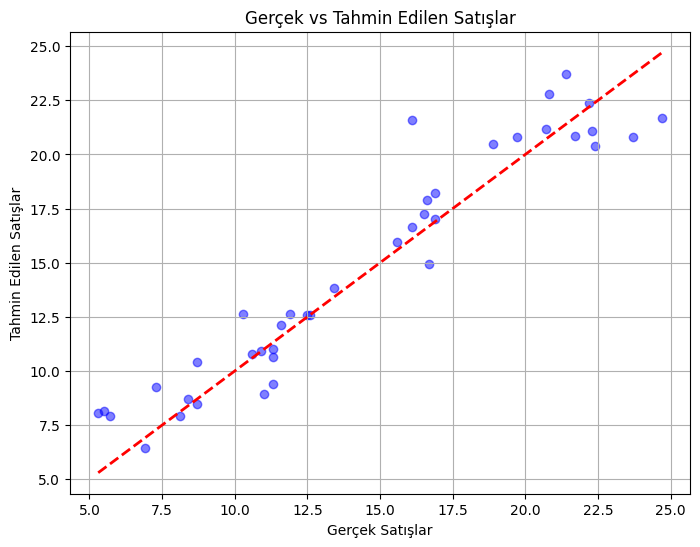

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Satışlar')
plt.ylabel('Tahmin Edilen Satışlar')
plt.title('Gerçek vs Tahmin Edilen Satışlar')
plt.grid(True)
plt.show()

## Project Summary

In this project, we built a linear regression model to predict sales based on advertising budgets for TV, Radio, and Newspaper. The steps included:

- **Data Exploration**: Analyzed the dataset and visualized correlations to understand relationships between ad budgets and sales.
- **Model Training**: Trained a linear regression model using scikit-learn.
- **Evaluation**: Assessed the model’s performance using R² score and MSE, and examined coefficients to identify the most impactful ad type.
- **Visualization**: Plotted actual vs. predicted sales to evaluate prediction accuracy.

**Findings**: The model effectively predicts sales, with TV advertising having the strongest impact on sales, as indicated by its high coefficient. This suggests prioritizing TV ad budgets for maximizing sales.